In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Project overview
This is the **Data exploration** project. It deals with the big amount of data connected to the global terrorism. 


### Data
The dataset is big. It contains information about 181691 acts of terrorism from 1970 through 2017, which are grouped in 135 collumns.

In [22]:
#reading the data form .csv file
data = pd.read_csv('globalterrorismdb_0718dist.csv', sep=',', encoding = "ISO-8859-1")

### Questions to answer

1. In which year was the highest number of acts of terrorism recorded?
2. Which country was the most dangerous from 2013 through 2017?
3. What type of weapon was the most common in 2017? Was it different than in 2000, 1980? 
4. How many people died or was hurt each year in the terrorism attact?
5. How has terrorism spread in Middle East and North Africa?

#### Choosing the data concected with the questions above

In [28]:
data.rename(columns={'iyear':'Year','country_txt':'Country','region_txt':'Region','target1':'Target','nkill':'Killed','nwound':'Wounded','weaptype1_txt':'Weapon_type'},inplace=True)
data=data[['Year','Country','Region','Killed', 'Wounded', 'Weapon_type']]

,Year,Country,Region,Killed,Wounded,Weapon_type
0,1970,Dominican Republic,Central America & Caribbean,1.0,0.0,Unknown
1,1970,Mexico,North America,0.0,0.0,Unknown
2,1970,Philippines,Southeast Asia,1.0,0.0,Unknown
3,1970,Greece,Western Europe,NaN,NaN,Explosives
4,1970,Japan,East Asia,NaN,NaN,Incendiary
5,1970,United States,North America,0.0,0.0,Firearms
6,1970,Uruguay,South America,0.0,0.0,Firearms
7,1970,United States,North America,0.0,0.0,Explosives
8,1970,United States,North America,0.0,0.0,Incendiary
9,1970,United States,North America,0.0,0.0,Incendiary


#### Ad.1
The figure below shows the number of terrorist attacts each year. Also the year, in which was the highest number of acts of terrorism recorded, is presented.

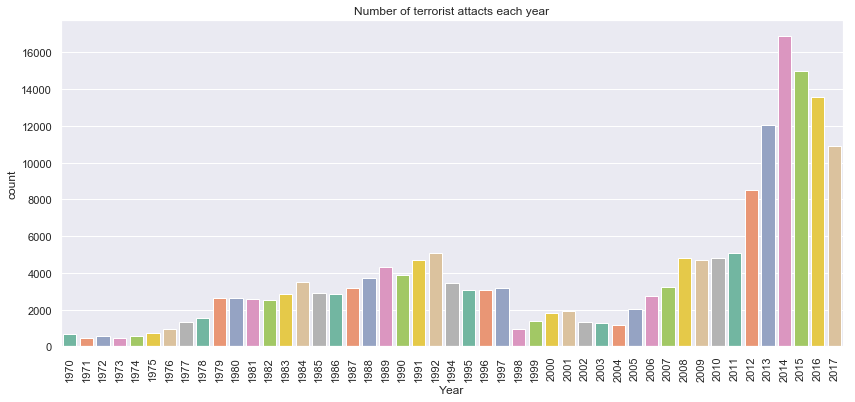

The year in which was the highest number of acts of terrorism recorded : 2014


In [37]:
plt.subplots(figsize=(14,6))
sns.countplot('Year',data=data,palette='Set2')
sns.set(style="darkgrid")
plt.xticks(rotation=90)
plt.title('Number of terrorist attacts each year')
plt.show()
print('The year in which was the highest number of acts of terrorism recorded :',data['Year'].value_counts().index[0])

#### Ad.2
The figure below shows the countries with the highest number of terrorist attacts from 2013 through 2017. To sum up, the country, in which was the highest number of acts of terrorism recorded, is presented.

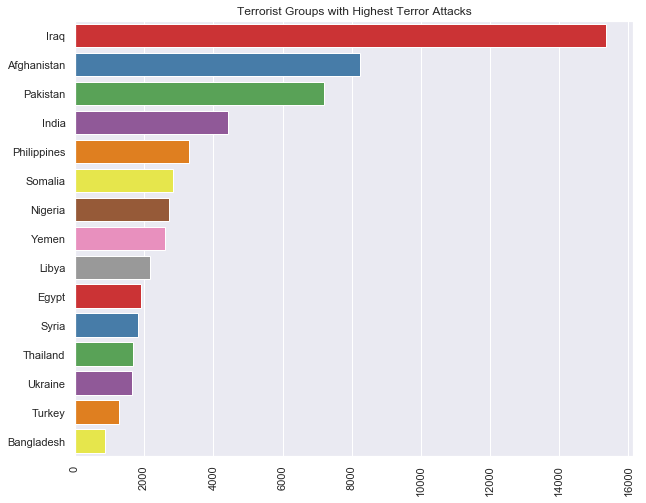

The country in which was the highest number of acts of terrorism recorded form 2013 trough 2017: Iraq


In [63]:
data1=data[data['Year']>2012]
#for better visualozation 15 countires selected
sns.barplot(data1['Country'].value_counts()[:15].values,data1['Country'].value_counts()[:15].index,palette=('Set1'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Countries with Highest Terror Attacks 2013-2017')
plt.show()
print('The country in which was the highest number of acts of terrorism recorded form 2013 through 2017:',data1['Country'].value_counts().index[0])

#### Ad.3

The figure below shows two the type of weapon that are most commonly used in terrorist attacks.  Also the  weapon type, that was the most 'popular' in 2017 and 1980, is presented.

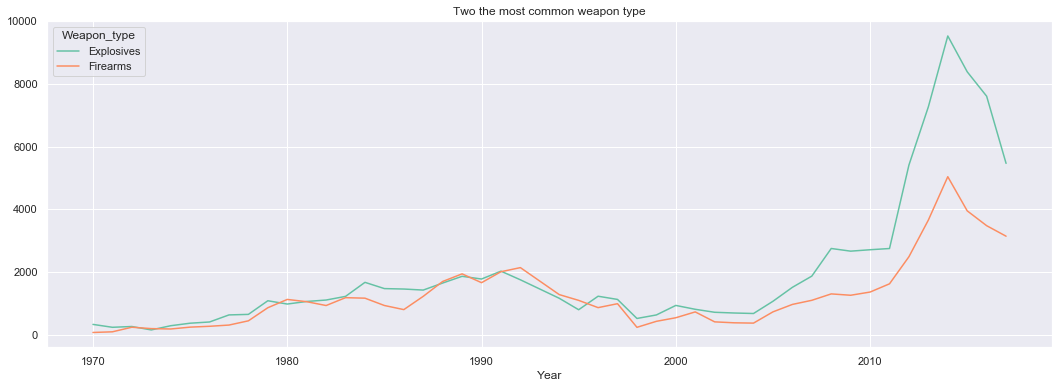

The type of weapon which was the most common in 2017: Explosives
The type of weapon which was the most common in 1980: Firearms


In [79]:
data2=data[data['Weapon_type'].isin(data['Weapon_type'].value_counts()[:2].index)]
pd.crosstab(data2.Year,data.Weapon_type).plot(color=sns.color_palette('Set2',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Two the most common weapon types')
plt.show()

data2017=data[data['Year']==2017]
data1980=data[data['Year']==1980]
print('The type of weapon which was the most common in 2017:',data2017['Weapon_type'].value_counts().index[0])
print('The type of weapon which was the most common in 1980:',data1980['Weapon_type'].value_counts().index[0])


#### Ad.4

The text below shows when the highest number of casualities of terrorism was recorded. 

In [111]:
data['casualities']=data['Killed']+data['Wounded']

print('The highest number of casualities of terrorism was recorded :',data['casualities'].max(), 'in', data.loc[data['casualities'].idxmax()].Year )
print('Maximum people killed in an attack are:',data['Killed'].max(),'that took place in',data.loc[data['Killed'].idxmax()].Country)
print('Maximum people hurted in an attack are:',data['Wounded'].max(),'that took place in',data.loc[data['Wounded'].idxmax()].Country)

The highest number of casualities of terrorism was recorded : 9574.0 in 2001
Maximum people killed in an attack are: 1570.0 that took place in Iraq
Maximum people hurted in an attack are: 8191.0 that took place in United States


#### Ad.5

The figure below shows the numbers of attacks in the Middle East & North Africa. We can observe that after the war in 2011 the number of act of terrorism increased rapidly. 

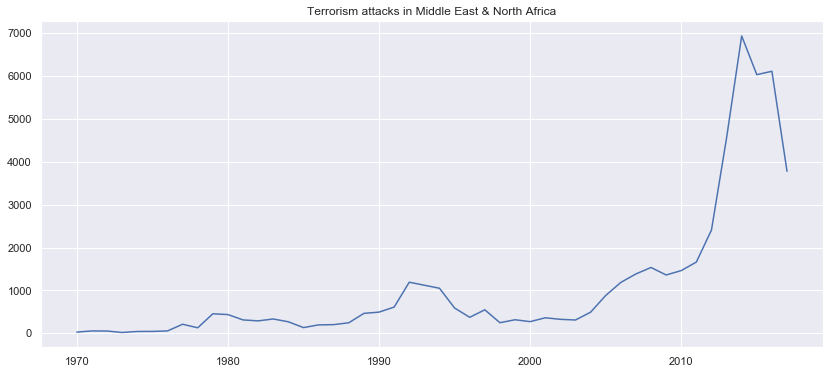

In [104]:
query = data.where(data.Region.str.startswith('Middle East & North Africa'))
dataMENA = query.dropna(how='all')
x = dataMENA['Year'].value_counts().sort_index()
plt.subplots(figsize=(14,6))
plt.plot(x)
plt.title('Terrorism attacks in Middle East & North Africa')
plt.show()